In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.model_selection import KFold, GridSearchCV, learning_curve
from sklearn.svm import SVR

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import time
init_time = time.time()

from utils import data_handler, plotter ,others

np.random.seed(3)

# Data Handling

In [21]:
title = 'cqd_'
task = 1

X,Y = data_handler.load_XY(task)
feature_list = X.columns

loading CQD dataset...


# Best Model 

In [22]:

# GradientBoost
xgb_reg = xgb.XGBRegressor(objective="reg:linear",min_child_weight=1,**{'tree_method':'exact'},silent=True,n_jobs=4,random_state=8767,seed=3,
                       learning_rate= 0.01,#0.01 
                        colsample_bylevel= 0.5,
                        reg_alpha =  1,
                  n_estimators=550, 
                  gamma= 0,
                  max_depth = 11, 
                  reg_lambda =  27,  
                  subsample= 0.4
                  )


xgb_reg.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=11, min_child_weight=1, missing=None, n_estimators=550,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=8767,
       reg_alpha=1, reg_lambda=27, scale_pos_weight=1, seed=3, silent=True,
       subsample=0.4, tree_method='exact')

Feature Importance of the model learns all information
 - explain the model's predictions using SHAP values

Feature importance...


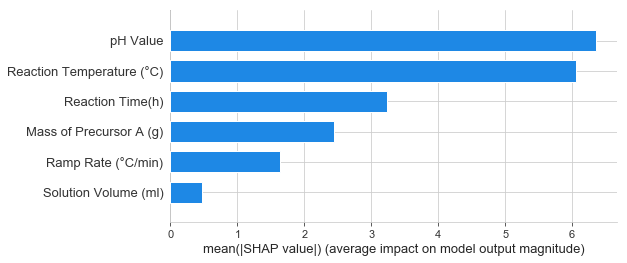

   pH Value  Reaction Temperature (°C)  Reaction Time(h)  \
0  0.314341                   0.300144           0.15985   

   Mass of Precursor A (g)  Ramp Rate (°C/min)  Solution Volume (ml)  
0                 0.121143            0.080842               0.02368  
Successfully saved : F:\projects\MoS2_Project_clean/results/cqd_feature_imp_sorted2019_6_10_1.csv


In [24]:
others.extract_feature_importance(xgb_reg,X,title)

# Self-generated fake inputs 

In [25]:
others.predict_fake_input(xgb_reg, task, title)

Number of generated conditions :  (1555840, 6)
Successfully saved : F:\projects\MoS2_Project_clean/results/cqd_pred_fake_input2019_6_10_1.csv


In [26]:
end_time = time.time()
print('total time = ',(end_time - init_time)/60,' mins')

total time =  0.7299203197161357  mins
